In [126]:
import random
import numpy as np
import matplotlib.pyplot as plt
from trace_graph import trace, draw_dot
%matplotlib inline

In [127]:
from tonygrad.engine import Value
from tonygrad.nn import Neuron, Layer, MLP

In [128]:
# test data, inputs, weights, test backprop function

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n' 
o = n.tanh(); o.label = 'o'
o.backward()

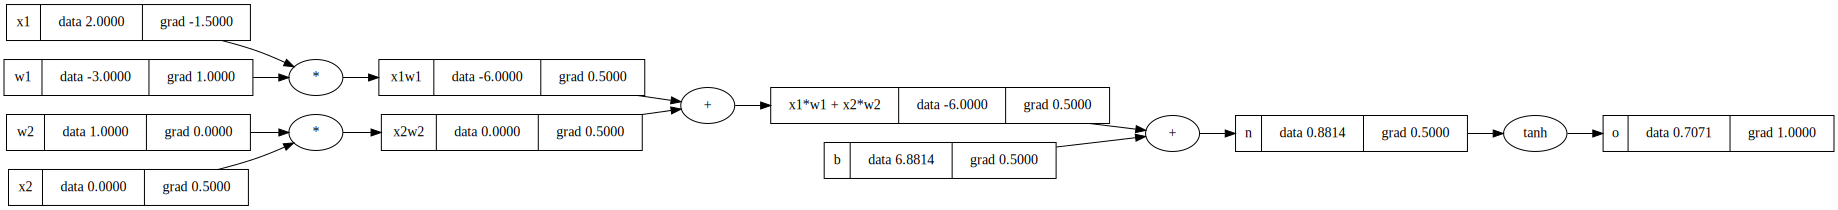

In [129]:
draw_dot(o)

In [130]:
# initialiazing a simple multi layer perceptron
# just by calling the .nn library
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.14796649376042809)

In [131]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

# TARGETS

ys = [0.0, 1.0, 0.0, 1.0]

In [132]:

for k in range (100):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  # print the loss func as it approaches to 0 (hopefully)
  print(k, loss.data)


0 1.5976493334158453
1 1.2435138137456874
2 0.5851390244248313
3 0.576668203255746
4 0.4086779481624997
5 0.2875214367716798
6 0.4791782103870059
7 1.5190064832862606
8 1.1188184563275607
9 0.6137752464192406
10 0.29857801303156084
11 0.11025296744009523
12 0.07400810389206028
13 0.06430447746569214
14 0.0810521247417074
15 0.11101022283368633
16 0.12102393109351933
17 0.19058659505250816
18 0.07954381548542838
19 0.2634111049172961
20 0.14615573592903736
21 0.22166029658600458
22 0.14435375747812357
23 0.2329572295555305
24 0.23503998730082104
25 0.20986240422068753
26 0.10220400331262038
27 0.08625185068891394
28 0.06584438644426992
29 0.0528631880119929
30 0.04414401361677745
31 0.04031189214106739
32 0.03432855539512908
33 0.03139245306189963
34 0.028354667505236755
35 0.027389970985143654
36 0.0261854475236786
37 0.024168217795928128
38 0.02228425140540337
39 0.021541751493797064
40 0.01971460707115477
41 0.020561855907223075
42 0.019759529453838614
43 0.02100275275601385
44 0.022

In [133]:
ypred

[Value(data=0.07102582519794895),
 Value(data=0.968501591234064),
 Value(data=0.04291555655783414),
 Value(data=0.9586899877138139)]